In [1]:
# Importing Libraries

import pandas as pd

In [2]:
# Load the Data

df = pd.read_csv('ecommerce_sales_analysis.csv')
df.head()

,product_id,product_name,category,price,review_score,review_count,sales_month_1,sales_month_2,sales_month_3,sales_month_4,sales_month_5,sales_month_6,sales_month_7,sales_month_8,sales_month_9,sales_month_10,sales_month_11,sales_month_12
0,1,Product_1,Clothing,190.40,1.7,220,479,449,92,784,604,904,446,603,807,252,695,306
1,2,Product_2,Home & Kitchen,475.60,3.2,903,21,989,861,863,524,128,610,436,176,294,772,353
2,3,Product_3,Toys,367.34,4.5,163,348,558,567,143,771,409,290,828,340,667,267,392
3,4,Product_4,Toys,301.34,3.9,951,725,678,59,15,937,421,670,933,56,157,168,203
4,5,Product_5,Books,82.23,4.2,220,682,451,649,301,620,293,411,258,854,548,770,257


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      1000 non-null   int64  
 1   product_name    1000 non-null   object 
 2   category        1000 non-null   object 
 3   price           1000 non-null   float64
 4   review_score    1000 non-null   float64
 5   review_count    1000 non-null   int64  
 6   sales_month_1   1000 non-null   int64  
 7   sales_month_2   1000 non-null   int64  
 8   sales_month_3   1000 non-null   int64  
 9   sales_month_4   1000 non-null   int64  
 10  sales_month_5   1000 non-null   int64  
 11  sales_month_6   1000 non-null   int64  
 12  sales_month_7   1000 non-null   int64  
 13  sales_month_8   1000 non-null   int64  
 14  sales_month_9   1000 non-null   int64  
 15  sales_month_10  1000 non-null   int64  
 16  sales_month_11  1000 non-null   int64  
 17  sales_month_12  1000 non-null   in

In [4]:
df.isnull().sum()

product_id        0
product_name      0
category          0
price             0
review_score      0
review_count      0
sales_month_1     0
sales_month_2     0
sales_month_3     0
sales_month_4     0
sales_month_5     0
sales_month_6     0
sales_month_7     0
sales_month_8     0
sales_month_9     0
sales_month_10    0
sales_month_11    0
sales_month_12    0
dtype: int64

In [5]:
df['category'].value_counts()

category
Books             154
Sports            153
Toys              151
Clothing          140
Health            139
Electronics       138
Home & Kitchen    125
Name: count, dtype: int64

In [6]:
df['review_count'].sum(axis=0)

526506

In [7]:
# Creating new column

new_cols = df.select_dtypes(include='number').iloc[:, -12:]

df['annual_sale'] = new_cols.sum(axis=1)
df.head()

,product_id,product_name,category,price,review_score,review_count,sales_month_1,sales_month_2,sales_month_3,sales_month_4,sales_month_5,sales_month_6,sales_month_7,sales_month_8,sales_month_9,sales_month_10,sales_month_11,sales_month_12,annual_sale
0,1,Product_1,Clothing,190.40,1.7,220,479,449,92,784,604,904,446,603,807,252,695,306,6421
1,2,Product_2,Home & Kitchen,475.60,3.2,903,21,989,861,863,524,128,610,436,176,294,772,353,6027
2,3,Product_3,Toys,367.34,4.5,163,348,558,567,143,771,409,290,828,340,667,267,392,5580
3,4,Product_4,Toys,301.34,3.9,951,725,678,59,15,937,421,670,933,56,157,168,203,5022
4,5,Product_5,Books,82.23,4.2,220,682,451,649,301,620,293,411,258,854,548,770,257,6094


In [8]:
total_annual_sale = df['annual_sale'].sum(axis=0)
total_annual_sale

6019912

In [9]:
total_user = df['review_count'].sum(axis=0)
total_user

526506

In [10]:
# Lets make another data frame for the value counts of category to know the total and percentage value for each unique values

unique_df = df.groupby('category')['annual_sale'].sum().reset_index()
unique_df

,category,annual_sale
0,Books,938229
1,Clothing,826536
2,Electronics,845120
3,Health,834414
4,Home & Kitchen,742141
5,Sports,916371
6,Toys,917101


In [11]:
unique_df['percentage(%)'] = (unique_df['annual_sale'] / total_annual_sale) * 100

In [12]:
unique_df['percentage(%)'] = unique_df['percentage(%)'].round(2)

In [13]:
unique_df

,category,annual_sale,percentage(%)
0,Books,938229,15.59
1,Clothing,826536,13.73
2,Electronics,845120,14.04
3,Health,834414,13.86
4,Home & Kitchen,742141,12.33
5,Sports,916371,15.22
6,Toys,917101,15.23


In [14]:
# Number of sale and review count ratio
new_df = df.groupby('category')['review_count'].sum().reset_index()
new_df

,category,review_count
0,Books,79263
1,Clothing,70347
2,Electronics,73862
3,Health,72398
4,Home & Kitchen,67735
5,Sports,83726
6,Toys,79175


In [15]:
unique_df['review_count'] = new_df['review_count']
unique_df

,category,annual_sale,percentage(%),review_count
0,Books,938229,15.59,79263
1,Clothing,826536,13.73,70347
2,Electronics,845120,14.04,73862
3,Health,834414,13.86,72398
4,Home & Kitchen,742141,12.33,67735
5,Sports,916371,15.22,83726
6,Toys,917101,15.23,79175


In [16]:
unique_df['user_percentage'] = (unique_df['review_count'] / total_user) * 100

In [17]:
unique_df['Average_user_spent'] = unique_df['annual_sale'] / unique_df['review_count'] 
unique_df

,category,annual_sale,percentage(%),review_count,user_percentage,Average_user_spent
0,Books,938229,15.59,79263,15.054529,11.836910
1,Clothing,826536,13.73,70347,13.361101,11.749414
2,Electronics,845120,14.04,73862,14.028710,11.441878
3,Health,834414,13.86,72398,13.750651,11.525374
4,Home & Kitchen,742141,12.33,67735,12.865001,10.956537
5,Sports,916371,15.22,83726,15.902193,10.944880
6,Toys,917101,15.23,79175,15.037815,11.583214



Insights for the table above

    The table presents a complete overview of several product categories based on annual sales, sales percentage, review count, average user spend, and user percentage. Among the categories, Books has the greatest annual sales of 938,229, accounting for 15.59% of total sales. The sales percentages across all categories are rather close, ranging from 12.33% to 15.59%, showing a reasonable distribution of sales. Notably, Home & Kitchen has the lowest sales proportion (12.33%).
    
    In terms of user interaction, the Sports category has the most reviews (83,726), while Home & Kitchen has the fewest (67,735). A larger review count typically indicates better consumer interest and interaction. When it comes to average user spending, Books again leads with an average of 11.84, while Electronics has the lowest at 11.44. Despite this, typical user expenditure values are rather consistent across categories, indicating comparable purchasing behaviors.

    Looking at user percentages, Sports has the highest at 15.90%, showing a large client base, while Health has the lowest at 13.75%. These figures demonstrate the distribution of users across several categories. The Books and Sports categories are the best performers, with Books outperforming in terms of annual sales and average user spend, and Sports demonstrating great customer involvement through review count and usage %.
    
    Home & Kitchen and Health, on the other hand, may use improvement. Home & Kitchen could improve consumer engagement and revenue by boosting the number of reviews and user percentage. Similarly, Health, which has the lowest user percentage, might focus on measures to increase client retention and expenditure. Overall, the findings indicate that, while Books and Sports are performing well, specific efforts could aid Home & Kitchen and Health in improving their performance indicators.

In [18]:
df.head()

,product_id,product_name,category,price,review_score,review_count,sales_month_1,sales_month_2,sales_month_3,sales_month_4,sales_month_5,sales_month_6,sales_month_7,sales_month_8,sales_month_9,sales_month_10,sales_month_11,sales_month_12,annual_sale
0,1,Product_1,Clothing,190.40,1.7,220,479,449,92,784,604,904,446,603,807,252,695,306,6421
1,2,Product_2,Home & Kitchen,475.60,3.2,903,21,989,861,863,524,128,610,436,176,294,772,353,6027
2,3,Product_3,Toys,367.34,4.5,163,348,558,567,143,771,409,290,828,340,667,267,392,5580
3,4,Product_4,Toys,301.34,3.9,951,725,678,59,15,937,421,670,933,56,157,168,203,5022
4,5,Product_5,Books,82.23,4.2,220,682,451,649,301,620,293,411,258,854,548,770,257,6094


In [19]:
aggregated_sales = pd.DataFrame()

In [20]:
for i in range(1, 13):
    # Aggregate sales for the current month
    sale_month_df = df.groupby('category')[f'sales_month_{i}'].sum().reset_index()
    sale_month_df.rename(columns={f'sales_month_{i}': f'sales_month_{i}_sum'}, inplace=True)
    
    # Merge the aggregated sales with the main DataFrame
    if aggregated_sales.empty:
        aggregated_sales = sale_month_df
    else:
        aggregated_sales = pd.merge(aggregated_sales, sale_month_df, on='category', how='outer')


In [21]:
aggregated_sales

,category,sales_month_1_sum,sales_month_2_sum,sales_month_3_sum,sales_month_4_sum,sales_month_5_sum,sales_month_6_sum,sales_month_7_sum,sales_month_8_sum,sales_month_9_sum,sales_month_10_sum,sales_month_11_sum,sales_month_12_sum
0,Books,77932,80079,76998,74699,79051,76644,79114,78108,77211,83504,76557,78332
1,Clothing,60966,67911,76796,70088,61643,63123,66105,74422,72675,68806,71683,72318
2,Electronics,76347,72472,70708,73158,72169,70060,72223,65754,69914,70148,68148,64019
3,Health,67644,67432,67602,72925,69178,63926,75256,69126,64581,72613,72500,71631
4,Home & Kitchen,57844,57252,62667,65388,59766,63169,60129,65042,58135,64876,66281,61592
5,Sports,77737,82244,75109,74287,73467,75641,77082,73912,79209,80187,74270,73226
6,Toys,79836,80271,76859,73278,71920,79090,77102,78205,70209,74664,76399,79268


In [22]:
aggregated_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   category            7 non-null      object
 1   sales_month_1_sum   7 non-null      int64 
 2   sales_month_2_sum   7 non-null      int64 
 3   sales_month_3_sum   7 non-null      int64 
 4   sales_month_4_sum   7 non-null      int64 
 5   sales_month_5_sum   7 non-null      int64 
 6   sales_month_6_sum   7 non-null      int64 
 7   sales_month_7_sum   7 non-null      int64 
 8   sales_month_8_sum   7 non-null      int64 
 9   sales_month_9_sum   7 non-null      int64 
 10  sales_month_10_sum  7 non-null      int64 
 11  sales_month_11_sum  7 non-null      int64 
 12  sales_month_12_sum  7 non-null      int64 
dtypes: int64(12), object(1)
memory usage: 860.0+ bytes


In [23]:
aggregated_sales.shape

(7, 13)

In [24]:
aggregated_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   category            7 non-null      object
 1   sales_month_1_sum   7 non-null      int64 
 2   sales_month_2_sum   7 non-null      int64 
 3   sales_month_3_sum   7 non-null      int64 
 4   sales_month_4_sum   7 non-null      int64 
 5   sales_month_5_sum   7 non-null      int64 
 6   sales_month_6_sum   7 non-null      int64 
 7   sales_month_7_sum   7 non-null      int64 
 8   sales_month_8_sum   7 non-null      int64 
 9   sales_month_9_sum   7 non-null      int64 
 10  sales_month_10_sum  7 non-null      int64 
 11  sales_month_11_sum  7 non-null      int64 
 12  sales_month_12_sum  7 non-null      int64 
dtypes: int64(12), object(1)
memory usage: 860.0+ bytes


In [25]:
for i in range(2, 13):
    column_current = f'sales_month_{i}_sum'
    column_previous = f'sales_month_{i-1}_sum'
    
    # Check if the columns exist
    if column_current in aggregated_sales.columns and column_previous in aggregated_sales.columns:
        sales_increase = (aggregated_sales[column_current] - aggregated_sales[column_previous]) / aggregated_sales[column_previous]
        aggregated_sales[f'rate_increase_{i-1}_to_{i}'] = sales_increase * 100
    else:
        print(f"Missing column(s): {column_current} or {column_previous}")
    

In [26]:
aggregated_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   category                7 non-null      object 
 1   sales_month_1_sum       7 non-null      int64  
 2   sales_month_2_sum       7 non-null      int64  
 3   sales_month_3_sum       7 non-null      int64  
 4   sales_month_4_sum       7 non-null      int64  
 5   sales_month_5_sum       7 non-null      int64  
 6   sales_month_6_sum       7 non-null      int64  
 7   sales_month_7_sum       7 non-null      int64  
 8   sales_month_8_sum       7 non-null      int64  
 9   sales_month_9_sum       7 non-null      int64  
 10  sales_month_10_sum      7 non-null      int64  
 11  sales_month_11_sum      7 non-null      int64  
 12  sales_month_12_sum      7 non-null      int64  
 13  rate_increase_1_to_2    7 non-null      float64
 14  rate_increase_2_to_3    7 non-null      float6

In [27]:
aggregated_sales['cumulative_growth_rate'] = (aggregated_sales['sales_month_1_sum'] / aggregated_sales['sales_month_12_sum'])**(1 / 12) - 1

In [28]:
aggregated_sales['cumulative_growth_rate']

0   -0.000427
1   -0.014129
2    0.014784
3   -0.004761
4   -0.005218
5    0.004994
6    0.000595
Name: cumulative_growth_rate, dtype: float64

In [29]:
# Plot the rate of increase
visualize_df = pd.DataFrame()

visualize_df = aggregated_sales.iloc[:, -11:].copy()

In [30]:
# Adding the 'category' column
visualize_df['category'] = aggregated_sales['category']

# Rearrange the columns to have 'category' as the first column
cols = ['category'] + [col for col in visualize_df if col != 'category']
visualize_df = visualize_df[cols]

In [31]:
visualize_df

,category,rate_increase_2_to_3,rate_increase_3_to_4,rate_increase_4_to_5,rate_increase_5_to_6,rate_increase_6_to_7,rate_increase_7_to_8,rate_increase_8_to_9,rate_increase_9_to_10,rate_increase_10_to_11,rate_increase_11_to_12,cumulative_growth_rate
0,Books,-3.847451,-2.985792,5.826049,-3.044870,3.222692,-1.271583,-1.148410,8.150393,-8.319362,2.318534,-0.000427
1,Clothing,13.083300,-8.734830,-12.049138,2.400921,4.724110,12.581499,-2.347424,-5.323701,4.181321,0.885845,-0.014129
2,Electronics,-2.434043,3.464954,-1.351869,-2.922307,3.087354,-8.956980,6.326611,0.334697,-2.851115,-6.058872,0.014784
3,Health,0.252106,7.874027,-5.138156,-7.592009,17.723618,-8.145530,-6.574950,12.437095,-0.155620,-1.198621,-0.004761
4,Home & Kitchen,9.458185,4.341998,-8.597908,5.693873,-4.812487,8.170766,-10.619292,11.595424,2.165670,-7.074426,-0.005218
5,Sports,-8.675405,-1.094409,-1.103827,2.959152,1.905051,-4.112504,7.166631,1.234708,-7.379002,-1.405682,0.004994
6,Toys,-4.250601,-4.659181,-1.853217,9.969410,-2.513592,1.430572,-10.224410,6.345340,2.323744,3.755285,0.000595


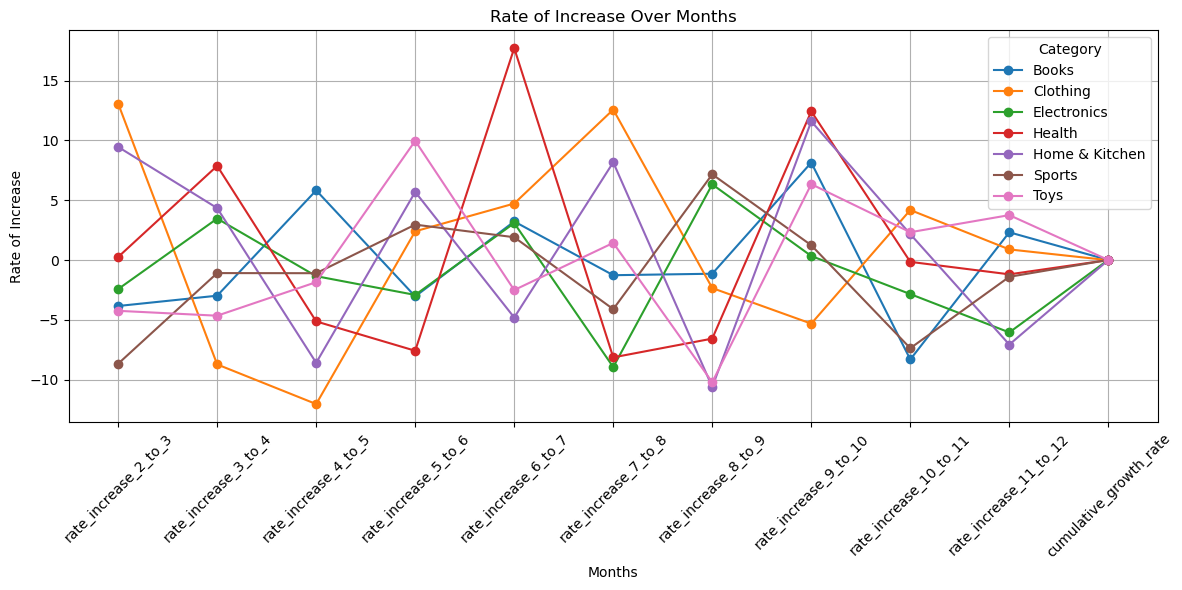

In [32]:
import matplotlib.pyplot as plt

df_transposed = visualize_df.set_index('category').T

# Plotting the line chart
plt.figure(figsize=(12, 6))

for col in df_transposed.columns:
    plt.plot(df_transposed.index, df_transposed[col], marker='o', label=col)

plt.title('Rate of Increase Over Months')
plt.xlabel('Months')
plt.ylabel('Rate of Increase')
plt.legend(title='Category')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

The graph represents the rate of monthly increase over 12 Months. The graph utilizes the monthly growth rate: (Current Month - Previous Month) / Previous Month * 100]. Some notable information is that Clothing has the highest rate of increase in the first month with 11.39% while Electronics' profit shows a temporary decline with -5.075% profit. We can high that all graphs has high volatility. For instance, Health is leading in rate of increase of profit from June to July by a large margin, however, by the end of the year, its rate of increase declines at around 1.20%.

In [33]:
visualize_df['cumulative_growth_rate'] = aggregated_sales['cumulative_growth_rate'] * 100

In [34]:
visualize_df['cumulative_growth_rate']

0   -0.042654
1   -1.412896
2    1.478395
3   -0.476107
4   -0.521819
5    0.499416
6    0.059518
Name: cumulative_growth_rate, dtype: float64

In [35]:
cumulative_growth_rate_df = visualize_df.groupby('category')['cumulative_growth_rate'].mean()
cumulative_growth_rate_df = cumulative_growth_rate_df.to_frame().reset_index()
cumulative_growth_rate_df.sort_values('cumulative_growth_rate', ascending=False).reset_index()

,index,category,cumulative_growth_rate
0,2,Electronics,1.478395
1,5,Sports,0.499416
2,6,Toys,0.059518
3,0,Books,-0.042654
4,3,Health,-0.476107
5,4,Home & Kitchen,-0.521819
6,1,Clothing,-1.412896


In this table, we calculate the overall growth rate by utilizing the compound monthly growth rate: (Latest Month/ First Month)^(1/# of Months) -1]. Electronics has the highest compounding monthly growth rate with around 1.48% increase, followed by Sports with 0.5%, and Toys with around 0.06%, and Toys at around 0.06%. On the other hand, Books, Health, Home & Kitchen, and Clothing exhibit a decline in growth rate.